# MULTIPLICACIÓN DE MATRICES EN PARALELO Y SECUENCIAL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tiempos de ejecución en secuencial

#### Tenemos un txt con 30 tiempos de ejecución por cada tamaño de matriz, siendo estos 100,250,500,750 y 1000

In [24]:
datos = pd.read_csv("datos_sec.txt")
datos.head()

,TAM_S,TIME_S
0,100,0.010003
1,100,0.011108
2,100,0.014442
3,100,0.011899
4,100,0.014796


#### Sacamos el promedio de los datos de la tabla secuencial 

In [20]:
datSeq = datos.groupby(["TAM_S"]).mean()
datSeq.reset_index(level=0,inplace=True)
datSeq

,TAM_S,TIME_S
0,100,0.012385
1,250,0.146465
2,500,1.133664
3,750,3.804383
4,1000,9.529782


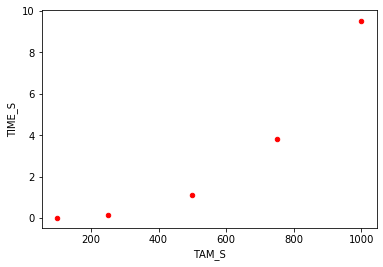

In [21]:
datSeq.plot(kind='scatter',x='TAM_S',y='TIME_S',color='red')
plt.show()

## Tiempos de ejecucion en paralelo

In [25]:
datos_p = pd.read_csv("datos_paralelo.txt")
datos_p.head()

,TAM_P,TIME_P
0,100,0.009932
1,100,0.007705
2,100,0.009588
3,100,0.009098
4,100,0.010790


In [26]:
datParl = datos_p.groupby(["TAM_P"]).mean()
datParl.reset_index(level=0,inplace=True)
datParl

,TAM_P,TIME_P
0,100,0.008112
1,250,0.089902
2,500,0.650179
3,750,2.177494
4,1000,5.264713


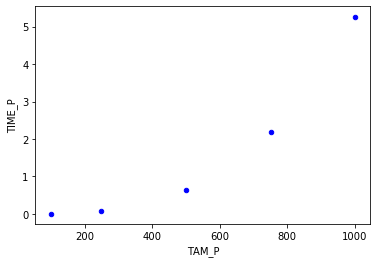

In [27]:
datParl.plot(kind='scatter',x='TAM_P',y='TIME_P',color='blue')
plt.show()

## Merge entre secuencial y paralelo 

In [48]:
datosMerge = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datParl, right_index=False,right_on = 'TAM_P')
datosMerge

,TAM_S,TIME_S,index,TAM_P,TIME_P
0,100,0.012385,0,100,0.008112
1,250,0.146465,1,250,0.089902
2,500,1.133664,2,500,0.650179
3,750,3.804383,3,750,2.177494
4,1000,9.529782,4,1000,5.264713


### $$Speedup = \frac{secuencial}{paralelo}$$

In [44]:
dat_t = datosMerge["TIME_S"]/ datosMerge["TIME_P"]
dat_t

0    1.526708
1    1.629168
2    1.743619
3    1.747138
4    1.810124
dtype: float64

# Speedup entre secuencial y paralelo

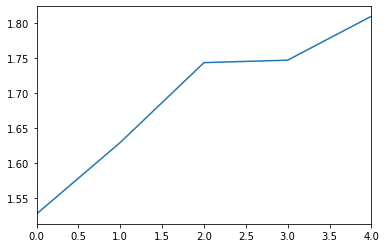

In [47]:
ax = plt.gca()
dat_t.plot(kind='line',x='TAM_S',y='datos_t', ax=ax)
plt.show()